In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow import lite as tflite
from keras.preprocessing.image import load_img
# from tensorflow.keras.applications.xception import preprocess_input

# TF Replacement
# import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor
from io import BytesIO
from urllib import request
from PIL import Image

# custom config
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


tf.__version__

'2.7.0'

In [2]:
!python -V
!pip install keras-image-helper

Python 3.8.11


In [3]:
# Check image
path = '/Users/rmcmaster/Documents/git_repos/pub_portfolio/mlz/08-deep-learning/train/cats'
name = 'cat.59.jpg'
fullname = path + '/' + name

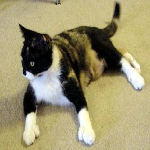

In [4]:
img = load_img(fullname, target_size=(150, 150))
img

In [5]:
model = keras.models.load_model('dogs_cats_10_0.687.h5')

2021-12-03 12:41:20.554470: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Convert Keras to TF-Lite

In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('dogs-cats-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2021-12-03 12:41:21.573372: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/cm/f7bqnp8d2k92zqpw9jr5cy3h0000gp/T/tmphg55ifie/assets


2021-12-03 12:41:23.614503: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2021-12-03 12:41:23.614530: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2021-12-03 12:41:23.620104: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/cm/f7bqnp8d2k92zqpw9jr5cy3h0000gp/T/tmphg55ifie
2021-12-03 12:41:23.627765: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2021-12-03 12:41:23.627836: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/cm/f7bqnp8d2k92zqpw9jr5cy3h0000gp/T/tmphg55ifie
2021-12-03 12:41:23.657874: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2021-12-03 12:41:23.938434: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/cm/f7bqnp8d2k92zqpw9jr5cy3h0000gp/T/tmphg55ifie
2021-12

44865956

In [7]:
!ls -lh

total 263360
-rw-r--r--  1 rmcmaster  staff   290B Nov 29 21:57 Dockerfile
-rw-r--r--  1 rmcmaster  staff   195K Nov 29 22:10 MLZ-Assignment09.ipynb
drwxr-xr-x  3 rmcmaster  staff    96B Nov 29 18:44 __pycache__
drwxr-xr-x  3 rmcmaster  staff    96B Nov 29 21:19 archive
-rw-r--r--  1 rmcmaster  staff    43M Dec  3 12:41 dogs-cats-model.tflite
-rw-r--r--@ 1 rmcmaster  staff    86M Nov 27 14:42 dogs_cats_10_0.687.h5
-rw-r--r--  1 rmcmaster  staff   753B Nov 29 22:03 lambda_function.py
-rw-r--r--  1 rmcmaster  staff   270B Nov 29 22:04 test.py


#### Q1 answer: 
Lite version is therefore 43M

### Q2

In [8]:
interpreter = tflite.Interpreter(model_path='dogs-cats-model.tflite')
interpreter.allocate_tensors()

In [9]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

input_index
output_index

0

13

#### Q2 answer: 
input is 0, output is 13

In [10]:
# interpreter.set_tensor(input_index, X)
# interpreter.invoke()

# pred = interpreter.get_tensor(output_index)
# pred

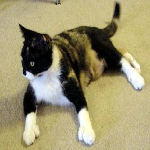

In [11]:
with Image.open(fullname) as img:
    img = img.resize((150, 150), Image.NEAREST)

img

### Preparing the image

In [12]:
def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [13]:
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg'

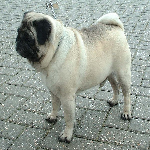

In [14]:
img = prepare_image(download_image(url), (150, 150))
img

### Q3
Now we need to turn the image into an numpy array and pre-process it.

Tip: Check the previous homework. What was the pre-processing we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

In [15]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

X[0][0][0:2]

array([[0.41176474, 0.54509807, 0.49803925],
       [0.38823533, 0.52156866, 0.45882356]], dtype=float32)

#### Q3 answer:
0.41176474

### Q4
Now let's apply this model to this image. What's the output of the model?

In [16]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

pred = interpreter.get_tensor(output_index)
pred

array([[0.97031206]], dtype=float32)

#### Q4 answer:
0.97031206


### Q5

#### Q5 answer:
sha256:101693c6a1561982251e08813372549e8d8f298d35407d31831b14f6a787202

### Q6

#### Q6 answer:
[0.8457329273223877]

In [18]:
# Extras (after Alexey's walkthrough)
!docker image ls -a

REPOSITORY          TAG       IMAGE ID       CREATED       SIZE
dogs-cats-model     latest    d3effdc544b7   3 days ago    780MB
<none>              <none>    eff934d6efcc   3 days ago    780MB
<none>              <none>    9cf546989818   3 days ago    780MB
zoomcamp_project    latest    03eb3b5767ee   3 weeks ago   1.23GB
resignation-model   latest    9aa1983dabf2   4 weeks ago   510MB
zoomcamp-model      latest    0f4e1d5d8419   7 weeks ago   510MB
<none>              <none>    48b4bfc1593a   7 weeks ago   510MB
